In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

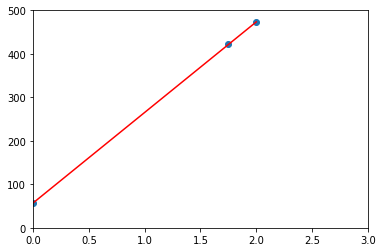

[208.21052632  57.07017544]
Distance(micro second) between each bin for histogram is 0.004802831142548645


In [2]:
# Calibrating timebase
_x = np.array([0,1.75,2])
_y = np.array([57,422,473])

def TAC(x,k,b):
    # Assume the TAC has linear mapping from time to amplitude
    return k*x+b

_popt, _pcov = curve_fit(TAC,_x,_y)

plt.xlim([0,3])
plt.ylim([0,500])
plt.plot(_x,TAC(_x,*_popt),'r-')
plt.scatter(_x,_y)
plt.show()
print(_popt)
dt = 1/_popt[0]

print("Distance(micro second) between each bin for histogram is {}".format(dt))

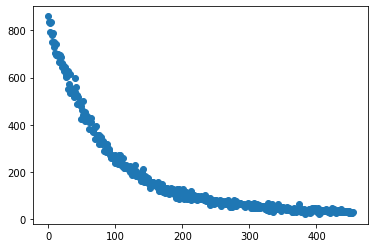

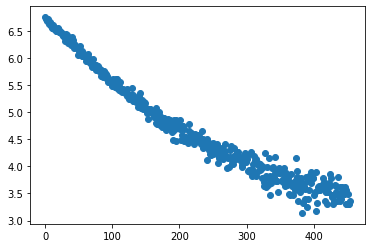

In [3]:
data = np.loadtxt("muon.txt")

# No useless bins
y = data[56:510]

# xs just used for plotting
x = np.linspace(0,y.shape[0],y.shape[0])

plt.scatter(x,y)
plt.show()

plt.scatter(x,np.log(y))
plt.show()

In [4]:
def N(x,a,b,c):
    # Fitting the exponetial decay for muon
    return a* np.exp(-b*x) + c

x is the time (histogram x axis) startring from 0 with a increment dt.

The first ten elements: [0.00000000e+00 4.80283114e-09 9.60566229e-09 1.44084934e-08
 1.92113246e-08 2.40141557e-08 2.88169869e-08 3.36198180e-08
 3.84226491e-08 4.32254803e-08]
The mean lifetime is 3.874560758635986e-07 sec


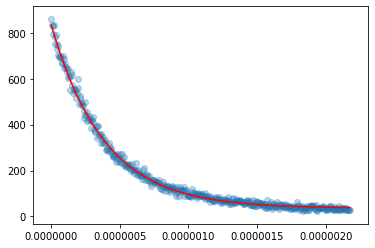

In [5]:
 
x = np.arange(0,10,dt)*1E-6
print('''x is the time (histogram x axis) startring from 0 with a increment dt.\n
The first ten elements:''',x[:10])

# Make xs and y the same shape to fit
xs = x[:y.shape[0]]

popt, pcov = curve_fit(N,xs,y)

print("The mean lifetime is {} sec".format(1/popt[1]))

plt.plot(xs,N(xs,*popt),'r-',label="fit")
plt.scatter(xs,y,alpha=0.3)
plt.show()